In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")


Numpy: 1.26.1
Pandas: 2.2.3
Seaborn: 0.13.0
Scikit-learn: 1.3.2


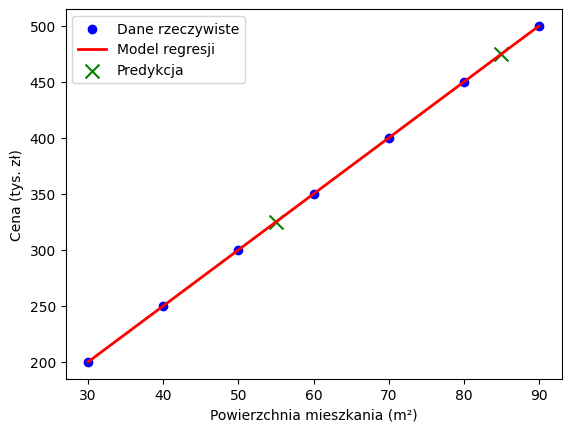

In [2]:

from sklearn.linear_model import LinearRegression

# Dane: powierzchnia mieszkania (m²) i cena (tys. zł)
X = np.array([30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
y = np.array([200, 250, 300, 350, 400, 450, 500])

# Tworzenie modelu
model = LinearRegression()
model.fit(X, y)  # Trenowanie modelu

# Predykcja dla nowych wartości
X_new = np.array([55, 85]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Wizualizacja
plt.scatter(X, y, color='blue', label="Dane rzeczywiste")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Model regresji")
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label="Predykcja")
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena (tys. zł)")
plt.legend()
plt.show()


In [3]:
X

array([[30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

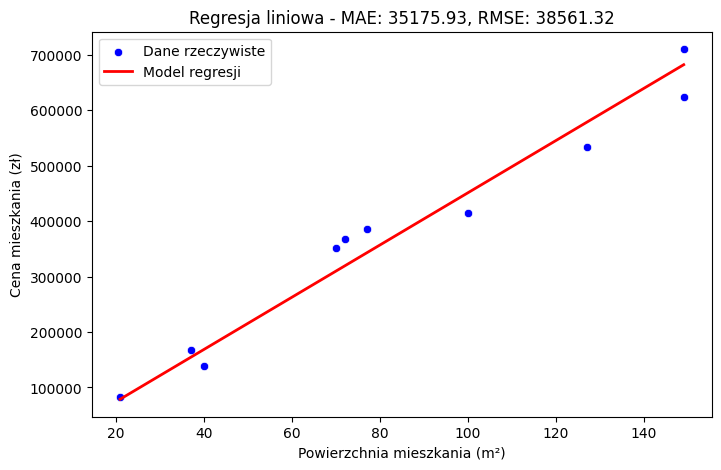

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📌 1. Generowanie danych - powierzchnia mieszkania i cena
np.random.seed(42)
X = np.random.randint(20, 150, 50).reshape(-1, 1)  # Powierzchnia (m²)
y = X.ravel() * 4500 + np.random.randint(-50000, 50000, 50)  # Cena mieszkania (zł)

# 📌 2. Podział danych na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 3. Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 4. Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# 📌 5. Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 📌 6. Wizualizacja wyników
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.ravel(), y=y_test, color='blue', label='Dane rzeczywiste')
sns.lineplot(x=X_test.ravel(), y=y_pred, color='red', linewidth=2, label='Model regresji')
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena mieszkania (zł)")
plt.legend()
plt.title(f"Regresja liniowa - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.show()

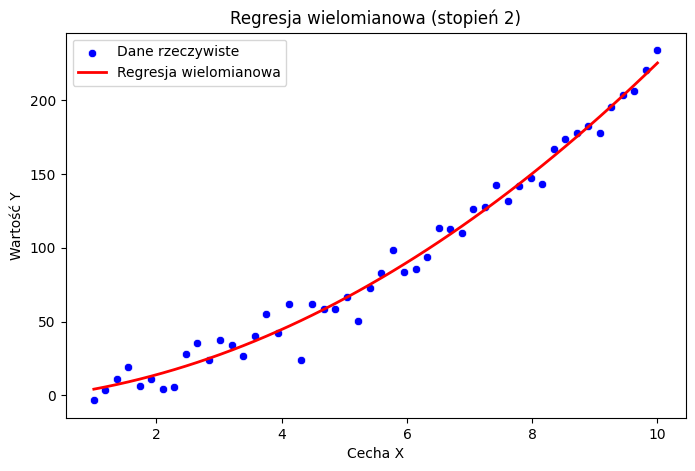

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# 📌 1. Generowanie nieliniowych danych
X = np.linspace(1, 10, 50).reshape(-1, 1)  # Zakres 1-10
y = 2 * X.ravel()**2 + 3 * X.ravel() + np.random.randn(50) * 10  # Funkcja kwadratowa z szumem

# 📌 2. Transformacja na cechy wielomianowe (np. x², x³)
poly = PolynomialFeatures(degree=2)  # Stopień wielomianu = 2
X_poly = poly.fit_transform(X)

# 📌 3. Trenowanie modelu regresji wielomianowej
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# 📌 4. Predykcja na nowych danych
y_pred_poly = model_poly.predict(X_poly)

# 📌 5. Wizualizacja
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.ravel(), y=y, color='blue', label="Dane rzeczywiste")
sns.lineplot(x=X.ravel(), y=y_pred_poly, color='red', linewidth=2, label="Regresja wielomianowa")
plt.xlabel("Cecha X")
plt.ylabel("Wartość Y")
plt.legend()
plt.title("Regresja wielomianowa (stopień 2)")
plt.show()


In [6]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

In [7]:
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [8]:

print(df.head())  
print(df.info())  
print(df.describe()) 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [9]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


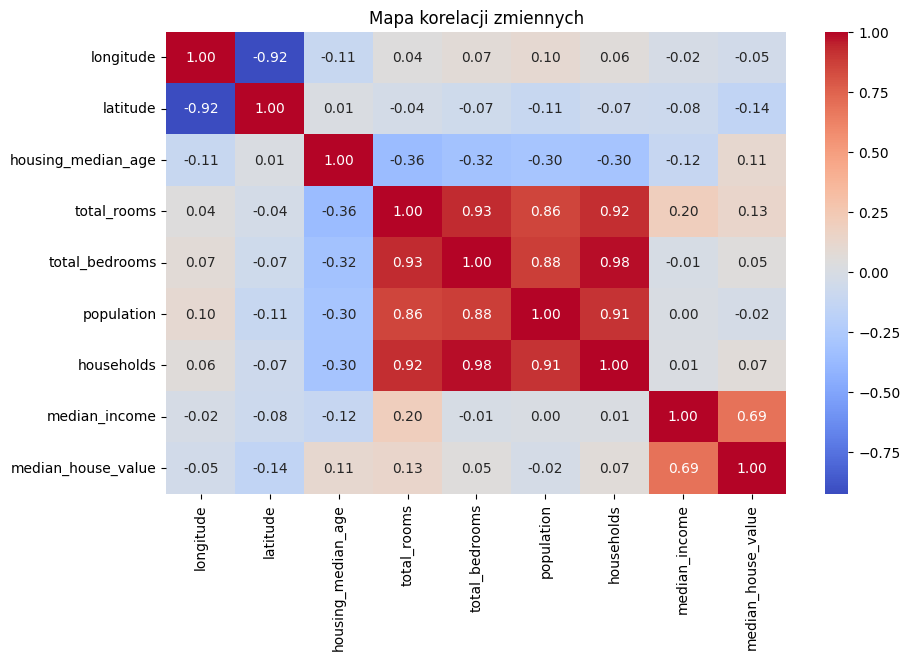

In [10]:

print(df.dtypes)
df_numeric = df.select_dtypes(include=['number'])  # Wybieramy tylko kolumny numeryczne
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa korelacji zmiennych")
plt.show()



In [11]:
df['Building_Type'] = np.random.choice(['Apartment', 'House', 'Loft'], size=len(df))
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  Building_Type  
0     Apartment  
1     Apartment  
2         Hous

In [12]:
df = pd.get_dummies(df, columns=['Building_Type'], drop_first=True)
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   Building_Type_House  Building_Type_Loft  
0                False 

In [13]:
from sklearn.preprocessing import StandardScaler
df = df.drop("ocean_proximity", axis=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            2.129631   
1    0.861439    1.669961       2.332238            1.314156   
2   -0.820777   -0.843637       1.782699            1.258693   
3   -0.766028   -0.733781       0.932968            1.165100   
4   -0.759847   -0.629157      -0.012881            1.172900   

   Building_Type_House  Building_Type_Loft  
0            -0.709498            -0.70118  
1            -0.709498            -0.70118  
2             1.409448       

In [14]:
# Calculate model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error


# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 35175.93
Mean Squared Error (MSE): 1486975283.18
Root Mean Squared Error (RMSE): 38561.32


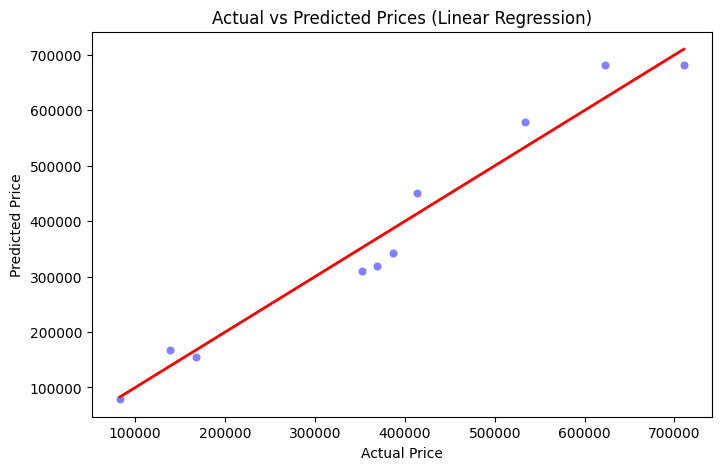

In [15]:
# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


Polynomial Regression (degree=2) - MAE: 34954.74, RMSE: 37421.20


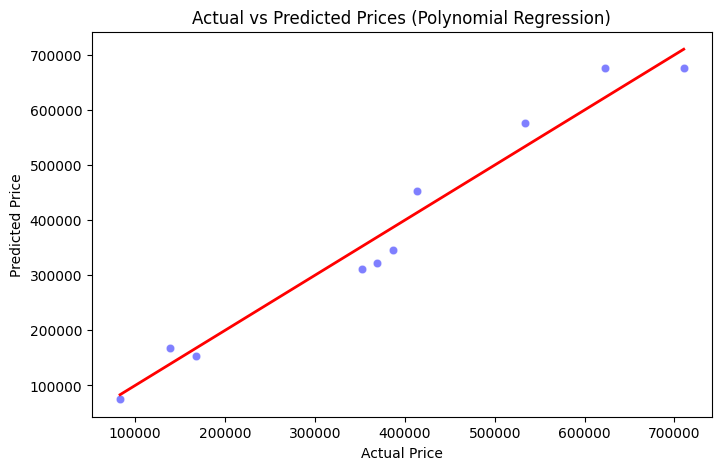

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)

# Create a pipeline that first transforms data, then fits a linear model
poly_model = make_pipeline(poly, LinearRegression())

# Train the model on training data
poly_model.fit(X_train, y_train)

# Predict on test data
y_poly_pred = poly_model.predict(X_test)

# Calculate error metrics
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)

# Print results
print(f"Polynomial Regression (degree=2) - MAE: {poly_mae:.2f}, RMSE: {poly_rmse:.2f}")

# Scatter plot: actual vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_poly_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Polynomial Regression)")
plt.show()


In [17]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model (alpha = regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on test set
y_ridge_pred = ridge_model.predict(X_test)

# Calculate error metrics
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))

# Print results
print(f"Ridge Regression - MAE: {ridge_mae:.2f}, RMSE: {ridge_rmse:.2f}")


Ridge Regression - MAE: 35174.39, RMSE: 38559.89


In [18]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model (alpha = regularization strength)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict on test set
y_lasso_pred = lasso_model.predict(X_test)

# Calculate error metrics
lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))

# Print results
print(f"Lasso Regression - MAE: {lasso_mae:.2f}, RMSE: {lasso_rmse:.2f}")


Lasso Regression - MAE: 35175.93, RMSE: 38561.32


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display basic info
print(df.head())
print(df.info())

# Select relevant features
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Handle missing values (fill missing Age with median)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables (Sex: male=1, female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Define features and target variable
X = df.drop(columns=['Survived'])  # Independent variables
y = df['Survived']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\USER\AppData\Local\Temp\ipykernel_22308\3679222483.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [20]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict survival on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC


In [21]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.79
Precision: 0.77
Recall: 0.72
F1 Score: 0.74
ROC AUC: 0.87


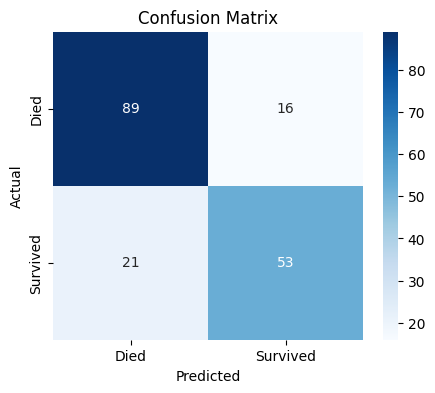

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit tree depth to avoid overfitting
tree_model.fit(X_train, y_train)

# Predict survival on test set
y_tree_pred = tree_model.predict(X_test)


In [24]:
# Calculate evaluation metrics
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_precision = precision_score(y_test, y_tree_pred)
tree_recall = recall_score(y_test, y_tree_pred)
tree_f1 = f1_score(y_test, y_tree_pred)

# Print results
print(f"Decision Tree - Accuracy: {tree_accuracy:.2f}")
print(f"Decision Tree - Precision: {tree_precision:.2f}")
print(f"Decision Tree - Recall: {tree_recall:.2f}")
print(f"Decision Tree - F1 Score: {tree_f1:.2f}")


Decision Tree - Accuracy: 0.80
Decision Tree - Precision: 0.80
Decision Tree - Recall: 0.69
Decision Tree - F1 Score: 0.74


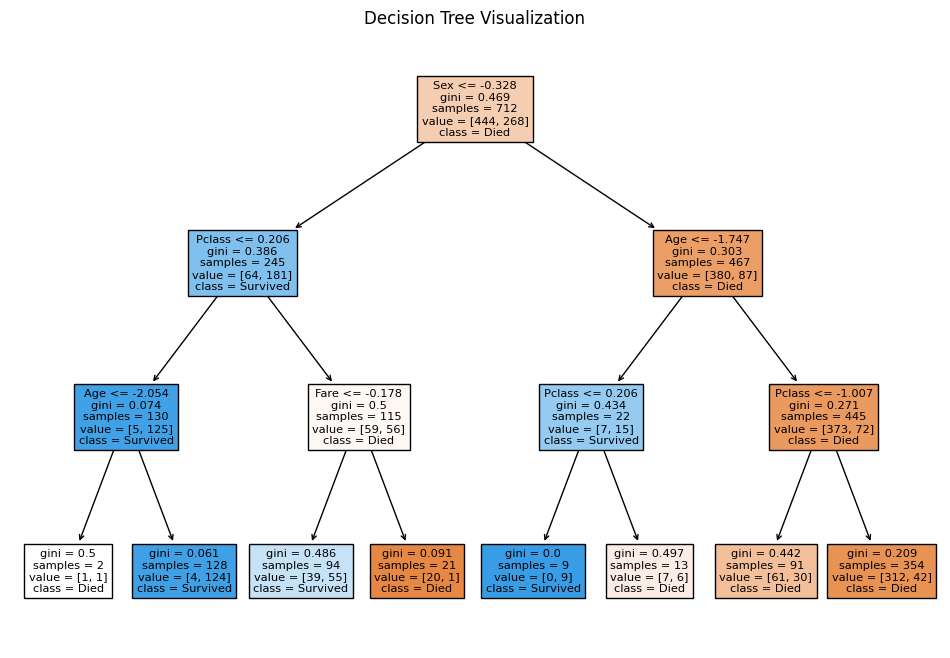

In [25]:
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Pruned Decision Tree - Accuracy: 0.80
Pruned Decision Tree - F1 Score: 0.74


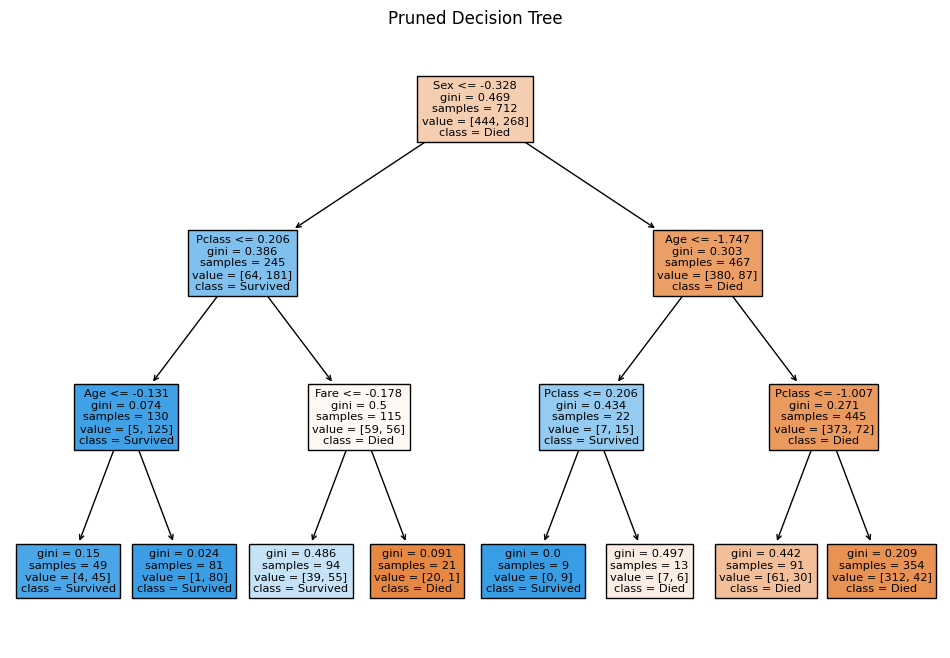

In [26]:
# Train a pruned Decision Tree model
pruned_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
pruned_tree.fit(X_train, y_train)

# Predict on test set
y_pruned_pred = pruned_tree.predict(X_test)

# Calculate new evaluation metrics
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
pruned_f1 = f1_score(y_test, y_pruned_pred)

# Print results
print(f"Pruned Decision Tree - Accuracy: {pruned_accuracy:.2f}")
print(f"Pruned Decision Tree - F1 Score: {pruned_f1:.2f}")

# Visualize pruned tree
plt.figure(figsize=(12,8))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.title("Pruned Decision Tree")
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model (100 trees)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict survival on test set
y_rf_pred = rf_model.predict(X_test)


In [28]:
# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)

# Print results
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest - Precision: {rf_precision:.2f}")
print(f"Random Forest - Recall: {rf_recall:.2f}")
print(f"Random Forest - F1 Score: {rf_f1:.2f}")


Random Forest - Accuracy: 0.81
Random Forest - Precision: 0.83
Random Forest - Recall: 0.68
Random Forest - F1 Score: 0.75


C:\Users\USER\AppData\Local\Temp\ipykernel_22308\3631949109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

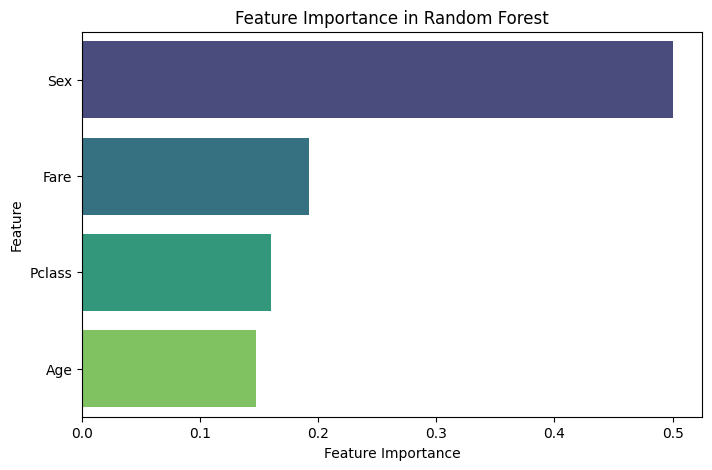

In [29]:
# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


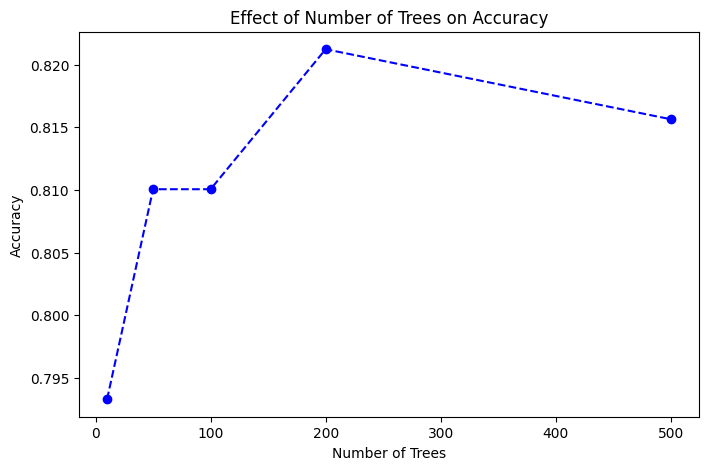

In [30]:
# Experiment with different number of trees
tree_counts = [10, 50, 100, 200, 500]
accuracy_scores = []

for n in tree_counts:
    rf_temp = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracy_scores.append(acc)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(tree_counts, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Effect of Number of Trees on Accuracy")
plt.show()
